# Tennis Ball Detection with Convolutional Neural Network

## Importing modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import os

## Dataset

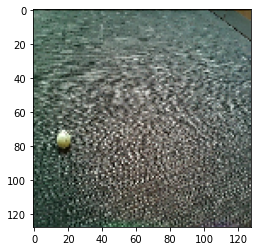

In [5]:
# Showing ball image
img = load_img('tennis-balls/test/balls/ball5.jpg', color_mode='rgb', target_size=(128,128))
img_arr = img_to_array(img)
plt.imshow(img)

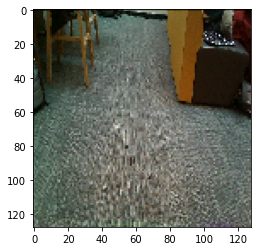

In [6]:
# Showing no ball image
img = load_img('tennis-balls/test/empty/empty6.jpg', color_mode='rgb', target_size=(128,128))
img_arr = img_to_array(img)
plt.imshow(img)

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder,filename), color_mode='rgb', target_size=(128, 128))
        img_arr = img_to_array(img)
        images.append(img_arr)
    return images

In [9]:
# Loading images
x_train_balls = load_images_from_folder('tennis-balls/train/balls')
x_train_empty = load_images_from_folder('tennis-balls/train/empty')

y_train = np.concatenate( ( np.ones(len(x_train_balls)), np.zeros(len(x_train_empty))) )
x_train = np.concatenate( (np.array(x_train_balls), np.array(x_train_empty) ) )

x_test_balls = load_images_from_folder('tennis-balls/test/balls')
x_test_empty = load_images_from_folder('tennis-balls/test/empty')

y_test = np.concatenate( (np.ones(len(x_test_balls)), np.zeros(len(x_test_empty))) )
x_test = np.concatenate( (np.array(x_test_balls), np.array(x_test_empty) ) )

# Shuffling
randomize_train = np.arange(len(y_train))
np.random.shuffle(randomize_train)

randomize_test = np.arange(len(y_test))
np.random.shuffle(randomize_test)

x_train = x_train[randomize_train]/255
y_train = y_train[randomize_train]

x_test = x_test[randomize_test]/255
y_test = y_test[randomize_test]

## Model

In [10]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

2022-06-06 12:46:49.918040: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-06 12:46:49.918701: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 12:46:49.919387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Training model

In [11]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=50)

2022-06-06 12:46:55.403819: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-06 12:46:55.422607: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


Epoch 1/50
26/26 [==============================] - 9s 284ms/step - loss: 0.7020 - accuracy: 0.4856 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
26/26 [==============================] - 8s 295ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
26/26 [==============================] - 7s 281ms/step - loss: 0.6934 - accuracy: 0.4931 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/50
26/26 [==============================] - 7s 264ms/step - loss: 0.6927 - accuracy: 0.5170 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
26/26 [==============================] - 7s 262ms/step - loss: 0.6954 - accuracy: 0.4599 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
26/26 [==============================] - 7s 277ms/step - loss: 0.6942 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
26/26 [==============================] - 8s 322ms/step - loss: 0.6929 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 

## History

In [12]:
history = pd.DataFrame(model.history.history)
model_loss = history.drop(columns=['accuracy', 'val_accuracy'])
model_accuracy = history.drop(columns=['loss', 'val_loss'])

<AxesSubplot:>

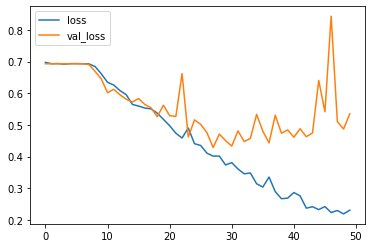

In [13]:
model_loss.plot()

<AxesSubplot:>

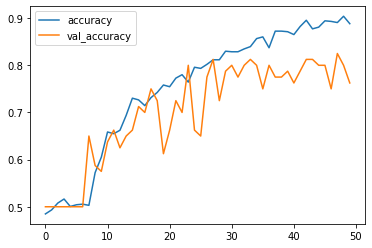

In [14]:
model_accuracy.plot()

## Model evaluation

In [15]:
predictions = np.rint(model.predict(x_test))

In [16]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.78        40
         1.0       0.80      0.70      0.75        40

    accuracy                           0.76        80
   macro avg       0.77      0.76      0.76        80
weighted avg       0.77      0.76      0.76        80



In [17]:
confusion_matrix(y_test, predictions)

array([[33,  7],
       [12, 28]])

Text(0.5, 1.0, 'prediction: [0.]')

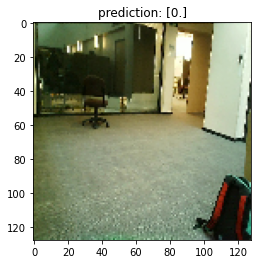

In [18]:
sample = 43
plt.imshow(x_test[sample], cmap=plt.cm.gray_r)
plt.title('prediction: ' + str(predictions[sample]) )

## Save model

In [19]:
model.save('tennis-balls.h5')

## Load model

In [20]:
model = tf.keras.models.load_model('tennis-balls.h5')